In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# zaman serisi için bir veri seti hazırlayacağım.
def generate_data(seq_length=50,num_samples=1000):
  X = np.linspace(0,100,num_samples) # 0-100 arası num_samples kadar veri oluşturur.
  y = np.sin(X)
  sequence = [] # giriş dizilerini saklamak için kullanacağım.
  targets = [] # hedef değerleri saklamak için kullanacağım.

  for i in range(len(X)-seq_length):
    sequence.append(y[i:i+seq_length]) # input
    targets.append(y[i+seq_length]) # input dizisinden sonra gelen değer

  X = np.linspace(-2*np.pi, 2*np.pi, 1000)

  Y = np.sin(X)

  plt.plot(X, Y)


  plt.title("Sinüs Dalgası Grafiği")
  plt.xlabel("X")
  plt.ylabel("sin(X)")


  plt.grid(True)

  plt.show()
  return np.array(sequence) , np.array(targets)

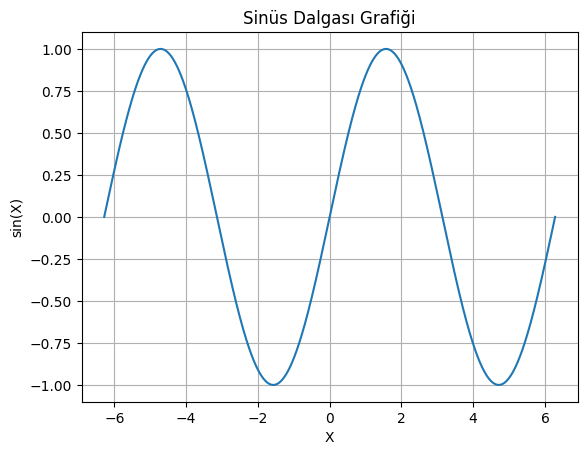

In [9]:
sequence,targets = generate_data()

In [4]:
sequence

array([[ 0.        ,  0.09993302,  0.19886554, ..., -0.99997048,
        -0.9957327 , -0.98152597],
       [ 0.09993302,  0.19886554,  0.29580708, ..., -0.9957327 ,
        -0.98152597, -0.95749254],
       [ 0.19886554,  0.29580708,  0.3897871 , ..., -0.98152597,
        -0.95749254, -0.92387301],
       ...,
       [ 0.52014028,  0.60288742,  0.67959865, ..., -0.85805249,
        -0.80243543, -0.73878464],
       [ 0.60288742,  0.67959865,  0.74950597, ..., -0.80243543,
        -0.73878464, -0.6677374 ],
       [ 0.67959865,  0.74950597,  0.81190948, ..., -0.73878464,
        -0.6677374 , -0.59000499]])

In [5]:
targets

array([-9.57492539e-01, -9.23873010e-01, -8.81003973e-01, -8.29314618e-01,
       -7.69322443e-01, -7.01628067e-01, -6.26909226e-01, -5.45913979e-01,
       -4.59453224e-01, -3.68392576e-01, -2.73643705e-01, -1.76155204e-01,
       -7.69030966e-02,  2.31189392e-02,  1.22909516e-01,  2.21469563e-01,
        3.17812332e-01,  4.10973269e-01,  5.00019679e-01,  5.84060060e-01,
        6.62253026e-01,  7.33815735e-01,  7.98031727e-01,  8.54258091e-01,
        9.01931909e-01,  9.40575886e-01,  9.69803131e-01,  9.89321030e-01,
        9.98934178e-01,  9.98546331e-01,  9.88161371e-01,  9.67883269e-01,
        9.37915044e-01,  8.98556726e-01,  8.50202358e-01,  7.93336048e-01,
        7.28527123e-01,  6.56424427e-01,  5.77749829e-01,  4.93290992e-01,
        4.03893491e-01,  3.10452344e-01,  2.13903051e-01,  1.15212232e-01,
        1.53679464e-02, -8.46301977e-02, -1.83781052e-01, -2.81091953e-01,
       -3.75588654e-01, -4.66325087e-01, -5.52392830e-01, -6.32930199e-01,
       -7.07130883e-01, -

In [19]:
class RNN(nn.Module):
  # Reccurent neural network tanımlanması
  # RNN => Linear(Output)
  def __init__(self,input_size,hidden_size,output_size,num_layers=1):
    super(RNN,self).__init__()
    # input_size=>giriş boyutu zaman serisi verisi için 1 olarak belirleyebiliriz.
    # hidden_size => RNN gizli katmanındaki düğüm sayısı yani hidden layerlarda bulunucak olan hücrelerin sayısı
    # num_layers => RNN ' nin kaç katmanlı olacağını belirler.
    self.rnn = nn.RNN(input_size,hidden_size,num_layers,batch_first=True) # RNN katmanı
    self.fc = nn.Linear(hidden_size,output_size) # fully connected layer output
  def forward(self,x):
    out,_ = self.rnn(x) # rnn'e girdiyi veriyoruz çıktıyı alıyoruz
    out = self.fc(out[:,-1,:]) # son zaman adımındaki çıktıyı alıyoruz ve fc layera bağlıyoruz
    return out

In [20]:
model = RNN(1,16,1,1)

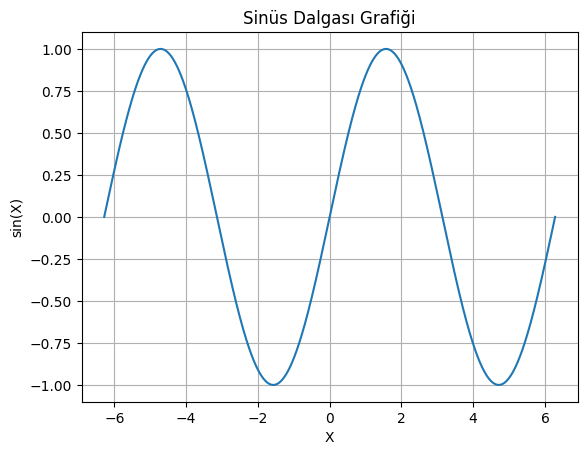

In [21]:
seq_length = 50 # input dizisinin boyutu
input_size = 1 # input dizisinin boyutu
hidden_size = 16 # rnn in gizli katmandaki düğüm sayısı
output_size = 1 # output boyutu ya da tahmin edilen değer
num_layers = 1 # rnn deki katman sayısı
epochs = 20 # modelin kaç kez tüm veri seti üzerinde eğitileceği
batch_size = 32 # her bir eğitim aşamasında kaç örneğin kullanılacağı
learning_rate = 0.001 # optimizasyon algoritması için öğrenme hızı

# veri hazırlama
X,y = generate_data(seq_length)
X = torch.tensor(X,dtype = torch.float32).unsqueeze(-1) # tensore çevirme işlemi unsqueeze le de boyut ekleme işi
y = torch.tensor(y,dtype = torch.float32).unsqueeze(-1)

In [22]:
X

tensor([[[ 0.0000],
         [ 0.0999],
         [ 0.1989],
         ...,
         [-1.0000],
         [-0.9957],
         [-0.9815]],

        [[ 0.0999],
         [ 0.1989],
         [ 0.2958],
         ...,
         [-0.9957],
         [-0.9815],
         [-0.9575]],

        [[ 0.1989],
         [ 0.2958],
         [ 0.3898],
         ...,
         [-0.9815],
         [-0.9575],
         [-0.9239]],

        ...,

        [[ 0.5201],
         [ 0.6029],
         [ 0.6796],
         ...,
         [-0.8581],
         [-0.8024],
         [-0.7388]],

        [[ 0.6029],
         [ 0.6796],
         [ 0.7495],
         ...,
         [-0.8024],
         [-0.7388],
         [-0.6677]],

        [[ 0.6796],
         [ 0.7495],
         [ 0.8119],
         ...,
         [-0.7388],
         [-0.6677],
         [-0.5900]]])

In [23]:
y

tensor([[-9.5749e-01],
        [-9.2387e-01],
        [-8.8100e-01],
        [-8.2931e-01],
        [-7.6932e-01],
        [-7.0163e-01],
        [-6.2691e-01],
        [-5.4591e-01],
        [-4.5945e-01],
        [-3.6839e-01],
        [-2.7364e-01],
        [-1.7616e-01],
        [-7.6903e-02],
        [ 2.3119e-02],
        [ 1.2291e-01],
        [ 2.2147e-01],
        [ 3.1781e-01],
        [ 4.1097e-01],
        [ 5.0002e-01],
        [ 5.8406e-01],
        [ 6.6225e-01],
        [ 7.3382e-01],
        [ 7.9803e-01],
        [ 8.5426e-01],
        [ 9.0193e-01],
        [ 9.4058e-01],
        [ 9.6980e-01],
        [ 9.8932e-01],
        [ 9.9893e-01],
        [ 9.9855e-01],
        [ 9.8816e-01],
        [ 9.6788e-01],
        [ 9.3792e-01],
        [ 8.9856e-01],
        [ 8.5020e-01],
        [ 7.9334e-01],
        [ 7.2853e-01],
        [ 6.5642e-01],
        [ 5.7775e-01],
        [ 4.9329e-01],
        [ 4.0389e-01],
        [ 3.1045e-01],
        [ 2.1390e-01],
        [ 1

In [24]:
dataset = torch.utils.data.TensorDataset(X,y) # pytorch dataset oluşumu
dataLoader = torch.utils.data.DataLoader(dataset,batch_size=batch_size,shuffle=True)

In [25]:
# model oluşumu
model = RNN(input_size,hidden_size,output_size,num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

for epoch in range(epochs):
  for batch_x,batch_y in dataLoader:
    optimizer.zero_grad()
    y_pred = model(batch_x)
    loss = criterion(y_pred,batch_y)
    loss.backward()
    optimizer.step()
  print(f"Epoch : {epoch+1}/{epochs}, Loss : {loss.item():.4f}")

Epoch : 1/20, Loss : 0.0964
Epoch : 2/20, Loss : 0.0335
Epoch : 3/20, Loss : 0.0196
Epoch : 4/20, Loss : 0.0083
Epoch : 5/20, Loss : 0.0044
Epoch : 6/20, Loss : 0.0020
Epoch : 7/20, Loss : 0.0010
Epoch : 8/20, Loss : 0.0013
Epoch : 9/20, Loss : 0.0010
Epoch : 10/20, Loss : 0.0009
Epoch : 11/20, Loss : 0.0006
Epoch : 12/20, Loss : 0.0005
Epoch : 13/20, Loss : 0.0003
Epoch : 14/20, Loss : 0.0003
Epoch : 15/20, Loss : 0.0005
Epoch : 16/20, Loss : 0.0003
Epoch : 17/20, Loss : 0.0003
Epoch : 18/20, Loss : 0.0003
Epoch : 19/20, Loss : 0.0002
Epoch : 20/20, Loss : 0.0002


In [26]:
# test veri oluşturma
X_test = np.linspace(100,110,seq_length).reshape(1,-1) # ilk test verisi
y_test = np.sin(X_test) # test verimizin gerçek değeri

X_test2 = np.linspace(120,130,seq_length).reshape(1,-1) # ikinci test verisi
y_test2 = np.sin(X_test2) # test verimizin gerçek değeri

In [27]:
# from numpy to tensor
X_test = torch.tensor(y_test,dtype=torch.float32).unsqueeze(-1)
X_test2 = torch.tensor(y_test2,dtype=torch.float32).unsqueeze(-1)

In [28]:
# prediction
model.eval()
prediction1 = model(X_test).detach().numpy() # ilk test verisi için tahmin
prediction2 = model(X_test2).detach().numpy()

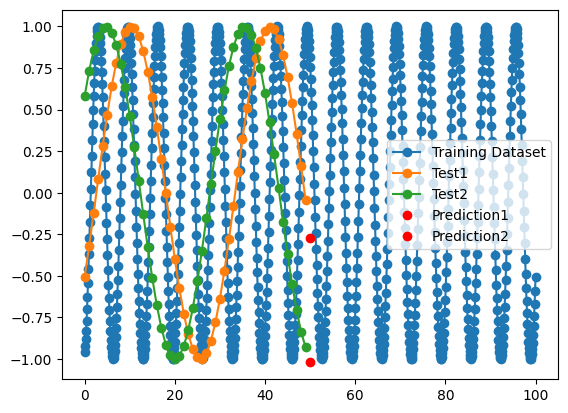

In [33]:
# Visualization
plt.figure()
plt.plot(np.linspace(0,100,len(y)),y,marker="o",label="Training Dataset")
plt.plot(X_test.numpy().flatten(),marker="o",label="Test1")
plt.plot(X_test2.numpy().flatten(),marker="o",label="Test2")

plt.plot(np.arange(seq_length,seq_length+1),prediction1.flatten(),"ro",label="Prediction1")
plt.plot(np.arange(seq_length,seq_length+1),prediction2.flatten(),"ro",label="Prediction2")
plt.legend()
plt.show()